In [1]:
# Data science tools
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Image processing
import nibabel as nib
from ThreeDLabeler.preprocessing import tag_parser
from ThreeDLabeler import images

# Base operations
from tqdm import tqdm
from io import StringIO
import os

# Cloud interface
from google.cloud import storage
credential_path = "/Users/michaeldac/Downloads/mouse-labeler-cff0443f5b5e.json"
os.environ['GOOGLE_APPLICATION_CREDENTIALS'] = credential_path



In [3]:
img_475 = nib.load("/Users/michaeldac/Code/CUNY/698/Skulls/475.mnc")

In [4]:
img_475 = img_475.get_data()
print("The data shape is:", img_475.shape)
print("The type of data is:", type(img_475))
np.set_printoptions(precision=2, suppress=True)
print(img_475[0:4, 0:4, 0:4])

The data shape is: (698, 397, 456)
The type of data is: <class 'numpy.ndarray'>
[[[-242.   -186.99 -304.03 -101.02]
  [ -59.98 -216.98 -267.03  -55.02]
  [  31.01   29.98 -118.01   68.97]
  [ -35.98  230.02  337.03  221.01]]

 [[-179.02  -62.    148.97  143.02]
  [ -72.02    7.98   93.98   99.02]
  [  59.02  125.    152.    146.  ]
  [  64.     -3.98  -45.98   40.99]]

 [[   8.03  128.02  128.99  -11.  ]
  [  92.01  181.01   90.02    1.02]
  [  88.99   41.98 -118.01  -69.98]
  [ 137.02   43.98 -114.99  -23.03]]

 [[-117.    -31.99  -94.99  -12.  ]
  [ 103.03   32.02 -155.98  -89.  ]
  [  -3.99   32.02 -208.   -107.98]
  [ 208.03  132.99 -178.99   26.98]]]


In [28]:
tag_475 = tag_parser('/Users/michaeldac/Code/CUNY/698/Skulls/475_landmarks.tag')
tag_475

array([[13.65,  7.05, 14.94],
       [10.07,  9.49,  8.1 ],
       [ 9.73,  5.17,  0.57],
       [ 6.82,  9.39,  7.67],
       [ 1.93,  6.43, 13.68]])

In [26]:
# import os
# from google.cloud import firestore
# credential_path = "/Users/michaeldac/Downloads/3DLabeler-ff833c2b4aaa.json"
# os.environ['GOOGLE_APPLICATION_CREDENTIALS'] = credential_path

# db = firestore.Client()
# doc_ref = db.collection(u'test_collection').document(u'tag_475')

### Looks like Firestore only allows JSON style objects and does not like arrays. [See here for more details](https://firebase.googleblog.com/2018/08/better-arrays-in-cloud-firestore.html)

In [5]:
# doc = db.collection(u'test_collection') \
#             .document(u'another_test')  \
#             .set(tag_475)


In [34]:
doc_ref.set({
    u'tag_name': u'tag_475',
    u'num_rows': u'50'})

update_time {
  seconds: 1573093271
  nanos: 722280000
}

In [35]:
test_dict = {
    "looks_like": "JSON",
    "walks_like": "JSON",
    "talks_like": "JSON",
    "ItMustBe": "JSONNNN"
}

In [36]:
db.collection(u'test_collection').document(u'another_test').set(test_dict)

update_time {
  seconds: 1573093561
  nanos: 217360000
}

### As you can see creating json/dict style files successfully pushes up

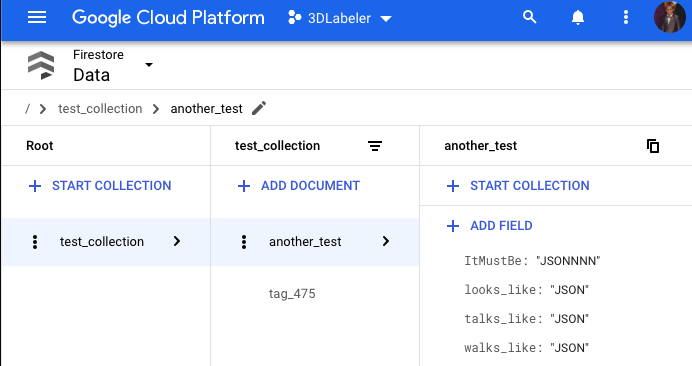

## --------------------
## Lets try Google Drive instead

In [6]:
# from pydrive.auth import GoogleAuth


# gauth = GoogleAuth()
# gauth.LocalWebserverAuth() 
# # Creates local webserver and auto handles authentication.

In [41]:
os.getcwd()

'/Users/michaeldac/Code/CUNY/698/3DLabeler'

In [60]:
from google_drive_downloader import GoogleDriveDownloader as gdd

gdd.download_file_from_google_drive(file_id='177Fq_r_b5E84RKHR0s2eJhaXevP3Um-0',
                                    dest_path='./Users/Code/CUNY/698',
                                    unzip=False)

## --------
## Nope, back to GCP, this time buckets

In [10]:
from google.cloud import storage
import os
credential_path = "/Users/michaeldac/Downloads/mouse-labeler-cff0443f5b5e.json"
os.environ['GOOGLE_APPLICATION_CREDENTIALS'] = credential_path

In [3]:
#client = storage.Client(project='quickstart-1573095918077')
storage_client = storage.Client(project='mouse-labeler')
bucket = storage_client.get_bucket('skull-images')
blob = bucket.blob('475_reduced.npy')
blob.upload_from_filename('475_reduced.npy')


#blob.download_to_filename(file_name)

In [4]:
os.listcwd()

AttributeError: module 'os' has no attribute 'listcwd'

In [45]:
mnc_files.sort(),tag_files.sort(), mnc_names.sort()

(None, None, None)

In [32]:
mnc_files

['475.mnc', '711_2_6.mnc', '717_2_6.mnc', '717_2_8.mnc', '930.mnc']

In [33]:
tag_files

['475_landmarks.tag',
 '711_2_6_landmarks.tag',
 '717_2_6_landmarks.tag',
 '717_2_8_landmarks.tag',
 '930_landmarks.tag']

In [46]:
mnc_names

['475', '711_2_6', '717_2_6', '717_2_8', '930']

In [37]:
data = img.get_data()
print("The data shape is:", data.shape)
print("The type of data is:", type(data))
np.set_printoptions(precision=2, suppress=True)
print(data[1:5, 1:5, 1:5])


The data shape is: (698, 397, 456)
The type of data is: <class 'numpy.ndarray'>
[[[   7.98   93.98   99.02  301.98]
  [ 125.    152.    146.    356.  ]
  [  -3.98  -45.98   40.99  198.01]
  [ -51.02   83.    129.    -26.01]]

 [[ 181.01   90.02    1.02   -0.98]
  [  41.98 -118.01  -69.98  -13.  ]
  [  43.98 -114.99  -23.03  -62.  ]
  [ 108.99   19.02 -105.99 -132.02]]

 [[  32.02 -155.98  -89.      0.99]
  [  32.02 -208.   -107.98  -92.02]
  [ 132.99 -178.99   26.98  -58.98]
  [ 328.99  -59.99   38.01  -43.98]]

 [[  81.98   30.    134.01  -18.  ]
  [  77.03  108.02  156.02  -16.01]
  [ -69.01  -71.97   19.02  -19.99]
  [-108.99 -174.    -16.98   45.98]]]


In [40]:
tag

array([[13.65,  7.05, 14.94],
       [10.07,  9.49,  8.1 ],
       [ 9.73,  5.17,  0.57],
       [ 6.82,  9.39,  7.67],
       [ 1.93,  6.43, 13.68]])

In [4]:
img = nib.load('/Users/michaeldac/Code/CUNY/698/Skulls/475.mnc')
tag = tag_parser('/Users/michaeldac/Code/CUNY/698/Skulls/475_landmarks.tag')
im = images.Image(img.get_data(), (0.035, 0.035, 0.035), tag)
im.cube().scale(128)

im.voxels.shape



(128, 128, 128)

In [52]:

skulls_folder = os.listdir('/Users/michaeldac/Code/CUNY/698/Skulls')

mnc_files = [f for f in skulls_folder if 'mnc' in f]
tag_files = [f for f in skulls_folder if 'tag' in f]
mnc_names = [i.split('.mnc')[0] for i in mnc_files]
    
mnc_files.sort(),tag_files.sort(), mnc_names.sort()
skulls_folder

['475.mnc',
 '930.mnc',
 '717_2_8.mnc',
 '717_2_6_landmarks.tag',
 '711_2_6.mnc',
 '717_2_6.nii',
 '717_2_8_landmarks.tag',
 '711_2_6_landmarks.tag',
 '475_landmarks.tag',
 '475.nii',
 '930.nii',
 '717_2_8.nii',
 '930_landmarks.tag',
 '711_2_6.nii',
 '717_2_6.mnc']

In [50]:
def package_to_npy(mnc_files, tag_files, mnc_names):
    """
    INPUT:  List of .mnc files, 
            List of corresponding .tag files, 
            List of .mnc prefix names
    
    The .mnc file is loaded 
    The .tag file is parsed and converted to an ndarray via tag_parser()
    Image class is instantiated with the .mnc and .tag file and cubes
    any images shaped as rectangular prisms and scales down image 
    resolution to 128x128x128.
    
    OUTPUT: Tuple of the processed .mnc and .tag files stored as .npy file 
    and saved to disk locally.
    """
    
    count = 0
    for i in tqdm(range(len(mnc_files))):
        img = nib.load(f'{skulls_folder}/{mnc_files[i]}')
        tag = tag_parser(f'{skulls_folder}/{tag_files[i]}')
        im = images.Image(img.get_data(), (0.035, 0.035, 0.035), tag)
        im.cube().scale(128)
        npy_file = (im.voxels, im.point_position)
        np.save(f'/Users/michaeldac/Code/CUNY/698/ReducedSkulls/{mnc_names[i]}.npy', npy_file)
        count += 1
    
    print('f{count} .mnc/.tag file pairs have been saved as .npy files')

In [53]:
package_to_npy(mnc_files, tag_files, mnc_names)

  0%|          | 0/5 [00:00<?, ?it/s]


FileNotFoundError: No such file or no access: '['475.mnc', '930.mnc', '717_2_8.mnc', '717_2_6_landmarks.tag', '711_2_6.mnc', '717_2_6.nii', '717_2_8_landmarks.tag', '711_2_6_landmarks.tag', '475_landmarks.tag', '475.nii', '930.nii', '717_2_8.nii', '930_landmarks.tag', '711_2_6.nii', '717_2_6.mnc']/475.mnc'

In [31]:
file_path = "/Users/michaeldac/Code/CUNY/698/ReducedSkulls"
os.listdir(file_path)
for filename in os.listdir(file_path):
    print(filename)

717_2_6.npy
711_2_6.npy
717_2_8.npy
930.npy
475.npy


In [41]:
path_to_files = '/Users/michaeldac/Code/CUNY/698/ReducedSkulls/'
project_name = 'mouse-labeler'
bucket_name = 'skull-images'

def upload_to_gcp(path_to_files, project_name, bucket_name ):
    storage_client = storage.Client(project=project_name)
    bucket = storage_client.get_bucket(bucket_name)
    
    count = 0
    for filename in os.listdir(file_path):
        blob = bucket.blob(filename)
        blob.upload_from_filename(file_path + filename)
        print(f'{filename} successfully uploaded to {bucket_name} bucket.')
        count += 1
    print(f'{count} blobs were uploaded to Project:{project_name}, Bucket:{bucket_name}')

# ** pip install --upgrade imagekit **      

In [40]:
upload_to_gcp(path_to_files, project_name, bucket_name)

717_2_6.npy successfully uploaded to skull-images bucket.
711_2_6.npy successfully uploaded to skull-images bucket.
717_2_8.npy successfully uploaded to skull-images bucket.
930.npy successfully uploaded to skull-images bucket.
475.npy successfully uploaded to skull-images bucket.
5 blobs were uploaded to Project:mouse-labeler, Bucket:skull-images


In [43]:
folder = "/Users/michaeldac/Code/CUNY/698/Downloaded_Skulls/"

if not os.path.exists(folder):
    os.makedirs(folder)

def download_blobs(folder, project_name, bucket_name):
    storage_client = storage.Client(project=project_name)
    bucket = storage_client.get_bucket(bucket_name)
    blobs = bucket.list_blobs()
    destination_path = f'{folder}{blob.name}'

    count = 0
    for blob in blobs:
        print(blob.name)
        destination_filename = f'{folder}{blob.name}'
        blob.download_to_filename(destination_filename)
        count += 1
    
    print(f'{count} blobs were downloaded to {folder}')    


475.npy
711_2_6.npy
717_2_6.npy
717_2_8.npy
930.npy
5 blobs were downloaded to /Users/michaeldac/Code/CUNY/698/Downloaded_Skulls/930.npy
